<a href="https://colab.research.google.com/github/anh1811/baocao/blob/main/DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse 

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


# New Section

In [ ]:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
import numpy as np
import random
import os

In [ ]:
import zipfile as zp
os.makedirs('content/data', exist_ok=True)

base_dir = '/content/drive/MyDrive/Data/dogs-vs-cats-redux-kernels-edition.zip'
base_zip = zp.ZipFile(base_dir)

base_zip.extractall('../data')


In [ ]:
train_dir = '../data/train'
test_dir = '../data/test'

train_zip = zp.ZipFile('../data/train.zip')
train_zip.extractall('../data')

# New Section

In [ ]:
from tqdm import tqdm
import cv2

In [ ]:
image_path = list(os.listdir(train_dir))

random.shuffle(image_path)

In [ ]:
labels = [p.split('.')[-3] for p in image_path]

le = LabelEncoder()
labels = le.fit_transform(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
list_image = []
for imagePath in image_path:
    path = os.path.join(train_dir,imagePath)
    image = cv2.imread(path)
    image = cv2.resize(image, (128,128))
    image = np.array(image)
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    list_image.append(image)
    
list_image = np.vstack(list_image)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# these are a new feature in TF 2.2
from tensorflow.keras.layers.experimental import preprocessing


pretrained_base = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

model = keras.Sequential([
    # Base
    pretrained_base,
    # Head
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])


58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
X_train, y_train = list_image[:20000], labels[:20000]
X_test, y_test = list_image[20000:25000], labels[20000:25000]

In [ ]:
# augmentation cho training data
aug_train = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# augementation cho test
aug_test= ImageDataGenerator(rescale=1./255)

In [ ]:
for layer in pretrained_base.layers:
    layer.trainable = False
opt = RMSprop(0.001)
#opt = 'adam'
model.compile(opt, 'binary_crossentropy', ['binary_accuracy'])
numOfEpoch = 25
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)/64,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=len(X_test)/64,
                        epochs=numOfEpoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
312/312 [==============================] - 119s 264ms/step - loss: 0.8573 - binary_accuracy: 0.7197 - val_loss: 0.2694 - val_binary_accuracy: 0.8784
Epoch 2/25
312/312 [==============================] - 81s 260ms/step - loss: 0.3782 - binary_accuracy: 0.8299 - val_loss: 0.2460 - val_binary_accuracy: 0.8966
Epoch 3/25
312/312 [==============================] - 81s 259ms/step - loss: 0.3379 - binary_accuracy: 0.8535 - val_loss: 0.2369 - val_binary_accuracy: 0.9026
Epoch 4/25
312/312 [==============================] - 80s 257ms/step - loss: 0.3272 - binary_accuracy: 0.8586 - val_loss: 0.2486 - val_binary_accuracy: 0.8942
Epoch 5/25
312/312 [==============================] - 80s 256ms/step - loss: 0.3267 - binary_accuracy: 0.8581 - val_loss: 0.2425 - val_binary_accuracy: 0.9006
Epoch 6/25
312/312 [==============================] - 80s 257ms/step - loss: 0.3109 - binary_accuracy: 0.8648 - val_loss: 0.2397 - val_binary_accuracy: 0.9044
Epoch 7/25
312/312 [=========================

In [ ]:
for layer in pretrained_base.layers[15:]:
    layer.trainable = True

numOfEpoch = 20
opt = SGD(0.001)
model.compile(opt, 'binary_crossentropy', ['binary_accuracy'])
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=250,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=250,
                        epochs=numOfEpoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 88/250 [=========>....................] - ETA: 37s - loss: 0.2707 - binary_accuracy: 0.8871

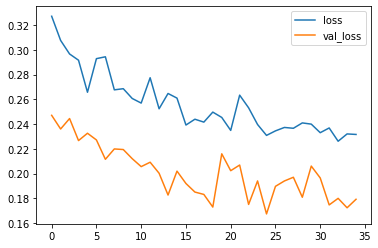

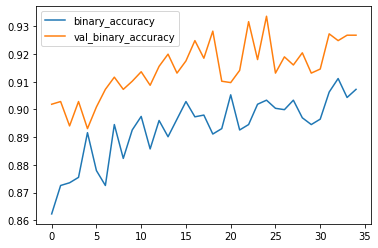

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
history_frame = pd.DataFrame(H.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# New Section